In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
WT_T0_T1 = pd.read_csv('../figures/direct/WT_T0_T1/top25_pathways.csv', index_col=0, sep=',').set_index('Pathways').T
WT_T0_T2 = pd.read_csv('../figures/direct/WT_T0_T2/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
MUT_T0_T1 = pd.read_csv('../figures/direct/MUT_T0_T1/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
MUT_T0_T2 = pd.read_csv('../figures/direct/MUT_T0_T2/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
WT_T0_T1 = WT_T0_T1.rename(index={WT_T0_T1.index[0]: "WT_T0_T1"})
WT_T0_T2 = WT_T0_T2.rename(index={WT_T0_T2.index[0]: "WT_T0_T2"})
MUT_T0_T1 = MUT_T0_T1.rename(index={MUT_T0_T1.index[0]: "MUT_T0_T1"})
MUT_T0_T2 = MUT_T0_T2.rename(index={MUT_T0_T2.index[0]: "MUT_T0_T2"})
WT_T0_T1

Pathways,MAPK,EGFR,Hypoxia,PI3K,TGFb,NFkB,JAK-STAT,p53,Trail,Estrogen,TNFa,Androgen,WNT,VEGF
WT_T0_T1,1.949202,-1.675549,1.463303,1.450633,-1.424732,-1.291368,-1.224709,0.886448,-0.704875,-0.695236,-0.627537,0.534618,-0.220663,0.141006


In [3]:
WT_T0_T2

Pathways,JAK-STAT,TGFb,NFkB,Hypoxia,p53,Trail,EGFR,PI3K,Estrogen,MAPK,TNFa,VEGF,Androgen,WNT
WT_T0_T2,-2.97924,-1.841876,-1.52228,1.428881,1.209253,-1.155623,-0.927926,0.75327,-0.570226,0.330065,-0.323599,-0.323363,-0.279723,-0.208748


In [4]:
MUT_T0_T1

Pathways,JAK-STAT,PI3K,WNT,Androgen,Hypoxia,TNFa,p53,NFkB,TGFb,MAPK,Estrogen,VEGF,Trail,EGFR
MUT_T0_T1,-4.523353,-2.417686,-1.919551,1.750336,0.833546,-0.82848,0.786407,0.665838,-0.651656,-0.332767,0.296782,-0.290308,-0.245007,0.094664


In [5]:
MUT_T0_T2

Pathways,JAK-STAT,WNT,PI3K,Trail,MAPK,Hypoxia,Estrogen,Androgen,EGFR,TGFb,VEGF,TNFa,NFkB,p53
MUT_T0_T2,-5.073081,-3.16755,-2.695829,-1.435531,-1.101185,1.086239,0.72165,0.644358,0.358994,0.273573,-0.224056,-0.170722,0.114953,-0.068597


In [6]:
all_dfs =[WT_T0_T1,WT_T0_T2,MUT_T0_T1,MUT_T0_T2]

In [7]:
combined_df = pd.concat(all_dfs, ignore_index=False)
#combined_df.index.name=("Pathways")
combined_df = combined_df.rename(columns={"TFs": "Pathways"})
combined_df

Pathways,MAPK,EGFR,Hypoxia,PI3K,TGFb,NFkB,JAK-STAT,p53,Trail,Estrogen,TNFa,Androgen,WNT,VEGF
WT_T0_T1,1.949202,-1.675549,1.463303,1.450633,-1.424732,-1.291368,-1.224709,0.886448,-0.704875,-0.695236,-0.627537,0.534618,-0.220663,0.141006
WT_T0_T2,0.330065,-0.927926,1.428881,0.753270,-1.841876,-1.522280,-2.979240,1.209253,-1.155623,-0.570226,-0.323599,-0.279723,-0.208748,-0.323363
MUT_T0_T1,-0.332767,0.094664,0.833546,-2.417686,-0.651656,0.665838,-4.523353,0.786407,-0.245007,0.296782,-0.828480,1.750336,-1.919551,-0.290308
MUT_T0_T2,-1.101185,0.358994,1.086239,-2.695829,0.273573,0.114953,-5.073081,-0.068597,-1.435531,0.721650,-0.170722,0.644358,-3.167550,-0.224056


<Figure size 1600x600 with 0 Axes>

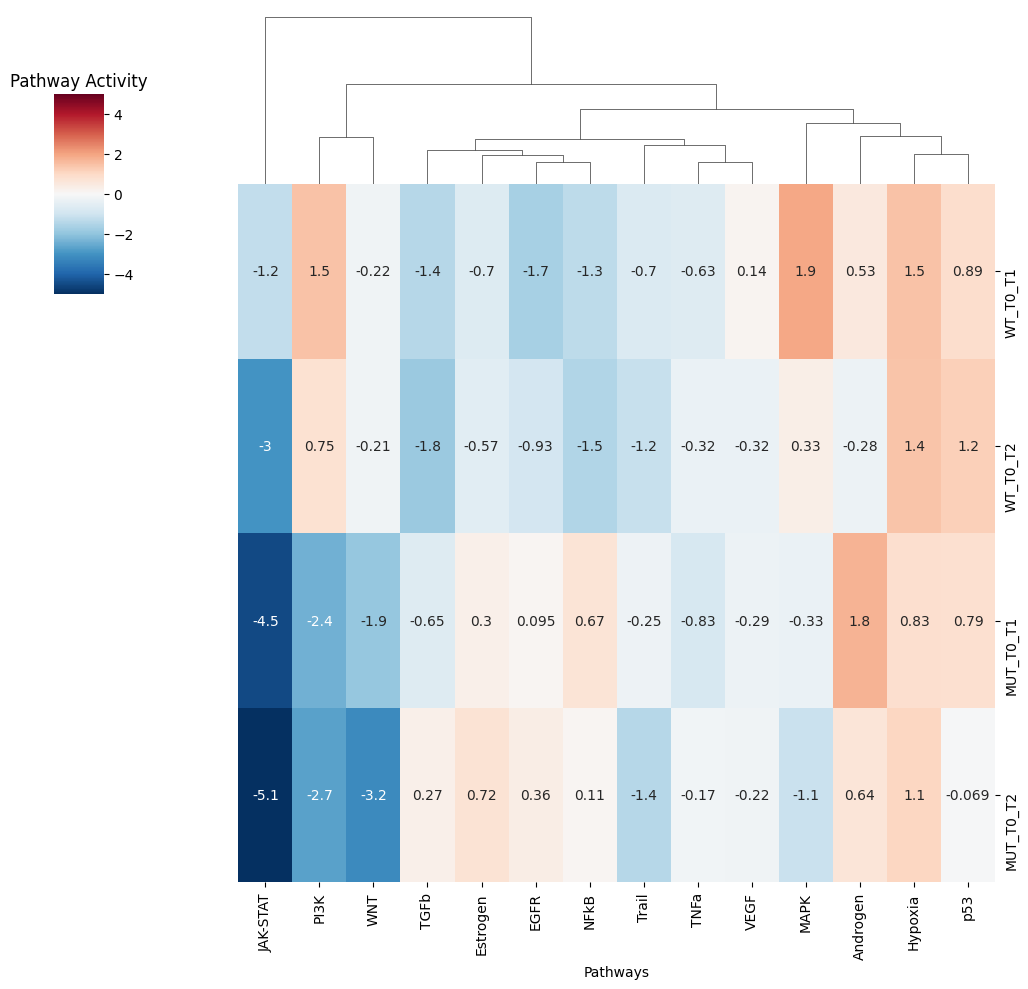

In [15]:
plt.figure(figsize=(16, 6))

# Create the heatmap with hierarchical clustering on the top
Z = linkage(combined_df.T, 'ward')
ax = sns.clustermap(
    combined_df,
    cmap='RdBu_r',
    annot=True,
    vmin=-5,
    vmax=5,
    row_cluster=False,  # Disable row clustering
    col_cluster=True,   # Enable column clustering
    dendrogram_ratio=(0.2, 0.2),
    cbar_pos=(0.02, 0.7, 0.05, 0.2)
)

plt.title('Pathway Activity')
plt.savefig("../figures/direct/compare/pathway_heatmap.png")
plt.show()